In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import layers

In [89]:
# Load Dataset
df = pd.read_csv(f"/content/nfl_data.csv")

dataset = df.values
categorical_columns = ['Team', 'Opponent']
categorical_indices = [df.columns.get_loc(col) for col in categorical_columns]


In [90]:
# Split data into Train / Test
x = dataset[:, :-1]
y = dataset[:, -1]

In [91]:
categorical_data = ['crd', 'atl', 'rav', 'buf', 'car', 'chi', 'cin', 'cle', 'dal', 'den', 'det',
 'gnb', 'htx', 'clt', 'jax', 'kan', 'rai', 'sdg', 'ram', 'mia', 'min', 'nwe',
 'nor', 'nyg', 'nyj', 'phi', 'pit', 'sfo', 'sea', 'tam', 'oti', 'was']
categorical_columns = ['Team', 'Opponent']

def encode_data(df, categorical_indices):
  # Extract the categorical columns from x
  categorical_x = x[:, categorical_indices]

  # Create a OneHotEncoder with predefined categories
  encoder = OneHotEncoder(categories=[categorical_data] * len(categorical_indices), sparse_output=False, handle_unknown='ignore')

  # Fit and transform the categorical data
  encoded_categorical = encoder.fit_transform(categorical_x)

  # Combine the encoded categorical data with the rest of x (excluding original categorical columns)
  non_categorical_indices = [i for i in range(x.shape[1]) if i not in categorical_indices]
  non_categorical_x = x[:, non_categorical_indices]

  # Concatenate encoded categorical data with the non-categorical data
  x_encoded = pd.DataFrame(np.hstack([encoded_categorical, non_categorical_x]))

  return x_encoded

In [92]:
x_preprocessed = encode_data(x, categorical_indices)
x_preprocessed

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,0,439.22,423.4,18.1,797,430,7,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5,1,588.99,557.2,25.6,1176,486,13,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6,1,672.0,640.2,28.4,1345,627,13,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7,0,792.47,760.7,33.8,1566,682,15,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8,1,909.9,878.1,36.9,1781,721,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13,1,1065.93,1066.1,52.3,2601,1435,15,0
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15,0,1161.12,1161.3,58.4,2761,1563,15,0
4253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16,1,1274.72,1274.9,60.8,2979,1716,16,0
4254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17,0,1303.29,1303.5,64.5,3134,1862,16,0


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(x_preprocessed, y, test_size=0.2, shuffle=True)
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

In [95]:
# Initialize the model
model = keras.Sequential(
    name = "nfl_model",
    layers = [
        keras.Input(shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu', name='layer1'),
        layers.Dense(32, activation='relu', name='layer2'),
        layers.Dense(1, activation='sigmoid', name='output'),
    ]
)

model.summary()

Model: "nfl_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 64)                  │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Build the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [97]:
# Train the model
hist = model.fit(X_train, Y_train, epochs=32, batch_size=16)

Epoch 1/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5040 - loss: 43993.0195
Epoch 2/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5159 - loss: 0.6923
Epoch 3/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5103 - loss: 0.6925
Epoch 4/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.6928
Epoch 5/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5206 - loss: 0.6921
Epoch 6/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5163 - loss: 0.6927
Epoch 7/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5148 - loss: 0.6922
Epoch 8/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5135 - loss: 0.6916
Epoch 9/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4985 - loss: 0.6927
Epoch 10/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5022 - loss: 0.6927
Epoch 11/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 0.6923
Epoch 12/32
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [ ]:
# Save the model
model.save('/content/nfl.keras')

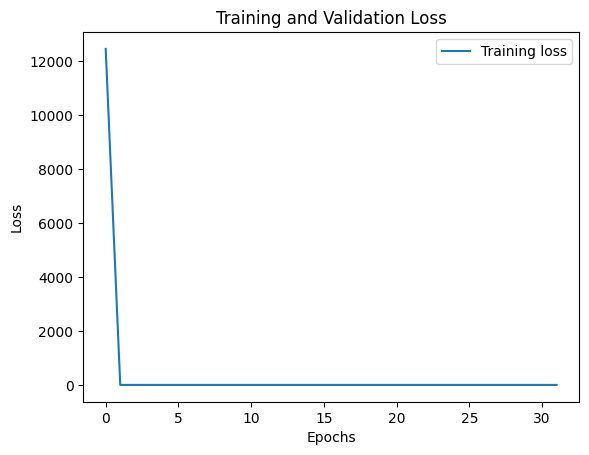

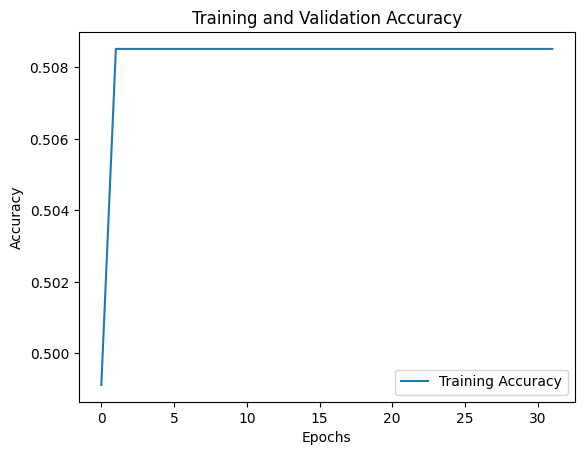

In [98]:
history_dict = hist.history

# Plotting loss over epochs
plt.plot(hist.history['loss'], label='Training loss')
if 'val_loss' in hist.history:
    plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# If you monitored accuracy or other metrics
if 'accuracy' in hist.history:
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in hist.history:
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [99]:
model.evaluate(X_test, Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4905 - loss: 0.6918


[0.6927646398544312, 0.4659624397754669]

In [102]:
# Test the model
test_data = np.array([[1,"ram","crd",1,77.5,77.5,5,243,123,0,2]])
test_data_processed = encode_data(test_data, categorical_indices)
test_data_processed = test_data_processed.astype('float32')

prediction = model.predict(test_data_processed)[0]

threshold = 0.5
prediction_class = 1 if prediction > threshold else 0

print(f"Prediction: {prediction}")
print(f"Prediction Class: {prediction_class}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction: [0.50794256]
Prediction Class: 1
